<a href="https://colab.research.google.com/github/Natalia-SB/portfolio/blob/main/vendas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de dados em busca de melhorias para as vendas

### 1. Definição do problema

> A empresa precisa prever quais os produtos mais vendidos, que loja está faturando mais em determinado periodo de tempo, assim podendo definir uma meta clara de aumento de vendas com base em dados



### 2. Importação de biblioteca e dados


In [16]:
#importação das bibliotecas

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#importação dos dados

vendas = pd.read_excel("vendas.xlsx")

### 3. Exploração de dados



> O dataframe possue dados sobre o código do produto, o produto, a quantidade, o nome do comprador, a data de compra, o local da loja e o preço por unidade



In [ ]:
#visão geral dos dados

display(vendas)

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario
0,HL4379,Televisão,5,Gabriel,Thoni,6/30/2018,Curitiba,2500
1,HL4379,Televisão,3,Renan,Nascimento,9/14/2018,Recife,2500
2,HL1148,Câmera,2,Camila,Sobral,10/21/2018,Fortaleza,2100
3,HL1918,iPhone,3,Clara,Bruno,7/8/2018,Fortaleza,5300
4,HL9962,Android,4,Eduardo,Pacheco,12/19/2018,Fortaleza,3400
...,...,...,...,...,...,...,...,...
9994,HL4379,Televisão,2,Caio,Ferreira,5/18/2018,Fortaleza,2500
9995,HL1148,Câmera,5,Kim,Ferreira,3/6/2018,Fortaleza,2100
9996,HL4379,Televisão,5,Caio,Moraes,1/22/2018,São Paulo,2500
9997,HL1918,iPhone,4,Norman,Jimbo,6/13/2018,Porto Alegre,5300


In [ ]:
#resumo estatistico dos dados

vendas.describe()

,Quantidade Vendida,Preco Unitario
count,9999.000000,9999.000000
mean,3.004600,3300.460046
std,1.405409,1449.490943
min,1.000000,1400.000000
25%,2.000000,2100.000000
50%,3.000000,3400.000000
75%,4.000000,5300.000000
max,5.000000,5300.000000


In [ ]:
#informações gerais do conjutos de dados

vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9999 entries, 0 to 9998
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   SKU                 9999 non-null   object
 1   Produto             9999 non-null   object
 2   Quantidade Vendida  9999 non-null   int64 
 3   Primeiro Nome       9999 non-null   object
 4   Sobrenome           9999 non-null   object
 5   Data                9999 non-null   object
 6   Loja                9999 non-null   object
 7   Preco Unitario      9999 non-null   int64 
dtypes: int64(2), object(6)
memory usage: 625.1+ KB


### 4. Limpeza de dados



> Para limpeza dos dados serão removidas duplicatas e valores ausentes


In [3]:
#remover duplicatas
vendas = vendas.drop_duplicates()

#Remover linhas com valores ausentes
vendas = vendas.dropna()

## 5. Transformação de dados



> Na transformação dos dados, para melhor visualização, será necessário formatar a data para o padrão brasileiro, juntar primeiro nome e sobrenome, mostrar o valor total das vendas...



In [4]:
#converter a coluna 'data' para um objeto datetime
vendas['Data'] = pd.to_datetime(vendas['Data'])

#formatando as datas no formato brasileiro
vendas['Data'] = vendas['Data'].dt.strftime('%d/%m/%Y')

In [5]:
#junção da coluna 'Primeiro Nome' e 'Sobrenome'
vendas['Nome'] = vendas['Primeiro Nome'] + ' ' + vendas['Sobrenome']

In [ ]:
display(vendas)

,SKU,Produto,Quantidade Vendida,Primeiro Nome,Sobrenome,Data,Loja,Preco Unitario,Nome
0,HL4379,Televisão,5,Gabriel,Thoni,30/06/2018,Curitiba,2500,Gabriel Thoni
1,HL4379,Televisão,3,Renan,Nascimento,14/09/2018,Recife,2500,Renan Nascimento
2,HL1148,Câmera,2,Camila,Sobral,21/10/2018,Fortaleza,2100,Camila Sobral
3,HL1918,iPhone,3,Clara,Bruno,08/07/2018,Fortaleza,5300,Clara Bruno
4,HL9962,Android,4,Eduardo,Pacheco,19/12/2018,Fortaleza,3400,Eduardo Pacheco
...,...,...,...,...,...,...,...,...,...
9994,HL4379,Televisão,2,Caio,Ferreira,18/05/2018,Fortaleza,2500,Caio Ferreira
9995,HL1148,Câmera,5,Kim,Ferreira,06/03/2018,Fortaleza,2100,Kim Ferreira
9996,HL4379,Televisão,5,Caio,Moraes,22/01/2018,São Paulo,2500,Caio Moraes
9997,HL1918,iPhone,4,Norman,Jimbo,13/06/2018,Porto Alegre,5300,Norman Jimbo


In [6]:
#remover a coluna 'Nome' do dataframe
Nome = vendas.pop('Nome')

#realocar a coluna 'Nome' para outra posição
vendas.insert(1, 'Nome', Nome)

In [7]:
#remover as colunas 'Primeiro Nome' e 'Sobrenome'
vendas = vendas.drop(['Primeiro Nome', 'Sobrenome'], axis=1)

In [8]:
#multiplicação da 'Quantidade Vendida' pelo 'Preço Unitário' para obter o 'Valor Total'
vendas['Valor Total'] = vendas['Quantidade Vendida'] * vendas['Preco Unitario']

In [9]:
#remover a coluna 'Quantidade Vendida' do dataframe
Quantidade_Vendida = vendas.pop('Quantidade Vendida')

#realocar a coluna 'Quantidade Vendida' para outra posição
vendas.insert(5, 'Quantidade Vendida', Quantidade_Vendida)

In [ ]:
display(vendas)

,SKU,Nome,Produto,Data,Loja,Quantidade Vendida,Preco Unitario,Valor Total
0,HL4379,Gabriel Thoni,Televisão,30/06/2018,Curitiba,5,2500,12500
1,HL4379,Renan Nascimento,Televisão,14/09/2018,Recife,3,2500,7500
2,HL1148,Camila Sobral,Câmera,21/10/2018,Fortaleza,2,2100,4200
3,HL1918,Clara Bruno,iPhone,08/07/2018,Fortaleza,3,5300,15900
4,HL9962,Eduardo Pacheco,Android,19/12/2018,Fortaleza,4,3400,13600
...,...,...,...,...,...,...,...,...
9994,HL4379,Caio Ferreira,Televisão,18/05/2018,Fortaleza,2,2500,5000
9995,HL1148,Kim Ferreira,Câmera,06/03/2018,Fortaleza,5,2100,10500
9996,HL4379,Caio Moraes,Televisão,22/01/2018,São Paulo,5,2500,12500
9997,HL1918,Norman Jimbo,iPhone,13/06/2018,Porto Alegre,4,5300,21200


## 6. Análise dos dados



> Após a limpeza e transformação dos dados será feita a análise dos dados em busca de *insights* para a melhoria das vendas


In [ ]:
print(vendas['Produto'].value_counts())

iPhone        2977
Televisão     1962
Android       1068
Notebook      1062
SmartWatch     995
Tablet         973
Câmera         962
Name: Produto, dtype: int64


In [ ]:
print(vendas['Loja'].value_counts())

São Paulo         2226
Rio de Janeiro    1467
Fortaleza         1447
Salvador          1330
Goiás              732
Recife             725
Curitiba           719
Porto Alegre       704
Belo Horizonte     649
Name: Loja, dtype: int64


In [ ]:
print(vendas.groupby('Produto')['Valor Total'].sum())

Produto
Android       10822200
Câmera         5890500
Notebook      11371500
SmartWatch     4172000
Tablet         4673600
Televisão     14827500
iPhone        47562200
Name: Valor Total, dtype: int64


In [ ]:
#informações das vendas agrupadas por produto, quantidade total vendida e pelo valor total vendido de cada produto

vendas [["Produto", "Quantidade Vendida", "Valor Total"]].groupby("Produto").sum()

,Quantidade Vendida,Valor Total
Produto,,
Android,3183,10822200
Câmera,2805,5890500
Notebook,3249,11371500
SmartWatch,2980,4172000
Tablet,2921,4673600
Televisão,5931,14827500
iPhone,8974,47562200


In [ ]:
#informações das vendas agrupadas por loja, produto, quantidade total vendida e pelo valor total vendido de cada produto

vendas [["Loja", "Produto", "Quantidade Vendida", "Valor Total"]].groupby(["Loja", "Produto"]).sum()

Quantidade Vendida  Valor Total
Loja           Produto                                    
Belo Horizonte Android                    224       761600
               Câmera                     174       365400
               Notebook                   213       745500
               SmartWatch                 166       232400
               Tablet                     194       310400
...                                       ...          ...
São Paulo      Notebook                   722      2527000
               SmartWatch                 654       915600
               Tablet                     619       990400
               Televisão                 1287      3217500
               iPhone                    1981     10499300

[63 rows x 2 columns]

In [ ]:
#informações das vendas agrupadas por loja, quantidade total vendida e pelo valor total vendido de cada produto

vendas [["Loja", "Quantidade Vendida", "Valor Total"]].groupby("Loja").sum()

,Quantidade Vendida,Valor Total
Loja,,
Belo Horizonte,1925,6480300
Curitiba,2151,7060500
Fortaleza,4320,14087900
Goiás,2242,7441800
Porto Alegre,2103,6868600
Recife,2208,7303000
Rio de Janeiro,4393,14867800
Salvador,4027,13111300
São Paulo,6674,22098300


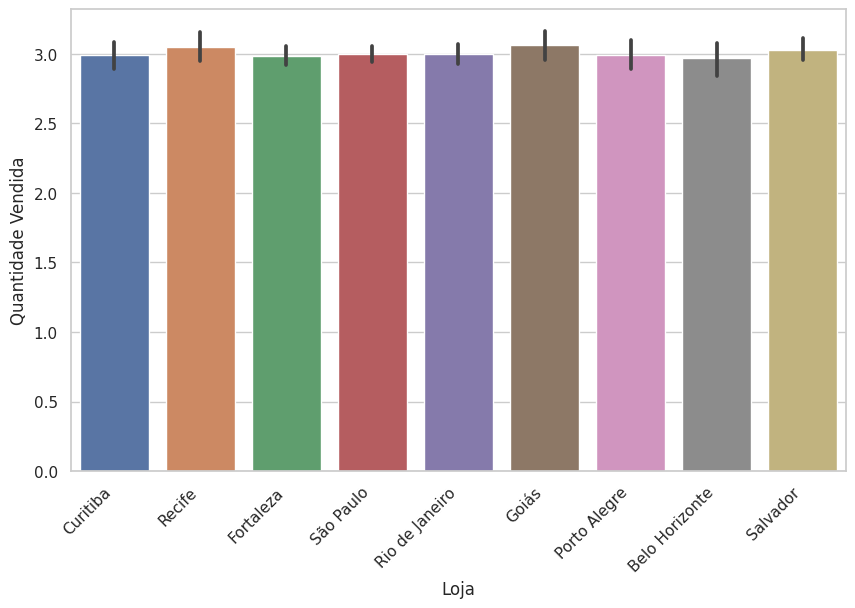

In [ ]:
#gráfico de barras horizontal para visualizar as vendas por loja

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x="Loja", y="Quantidade Vendida", data=vendas, ax=ax, width=0.8)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
plt.show()

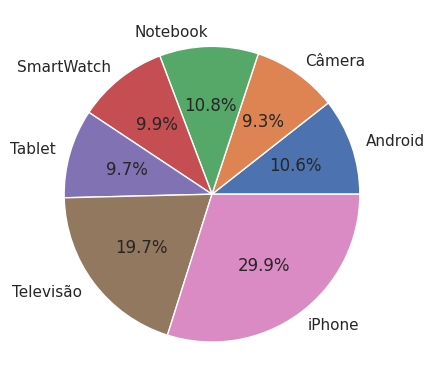

In [ ]:
#gráfico de pizza para visualizar a proporção de vendas por produto

produtos = vendas.groupby('Produto')['Quantidade Vendida'].sum()
plt.pie(produtos, labels=produtos.index, autopct='%1.1f%%')
plt.show()

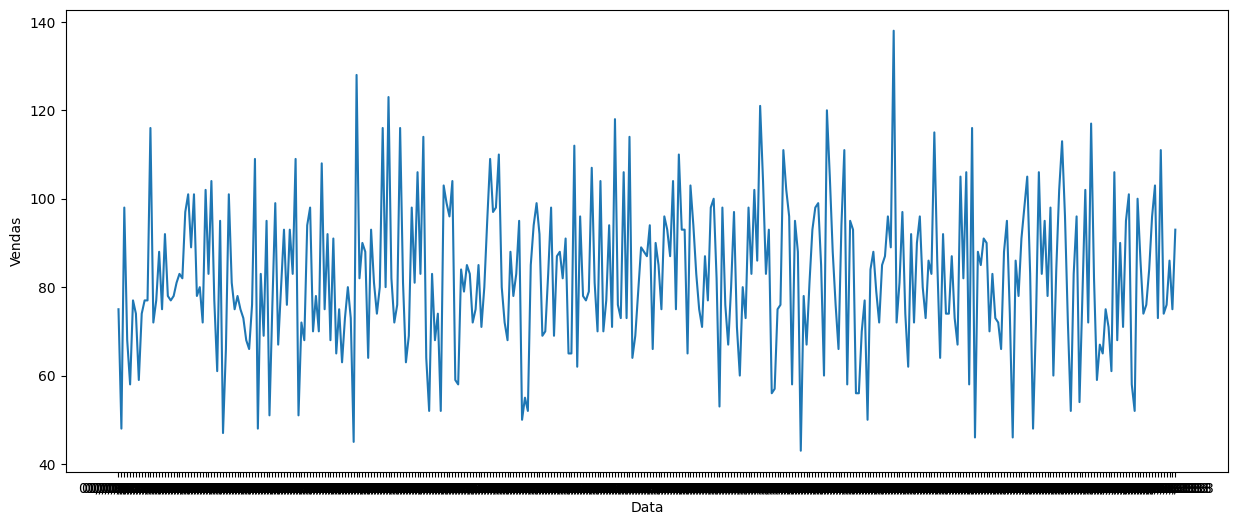

In [19]:
#gráfico de linhas para visualizar a evolução das vendas ao longo do tempo

vendas_por_data = vendas.groupby('Data')['Quantidade Vendida'].sum()

plt.figure(figsize=(15, 6))

plt.plot(vendas_por_data.index, vendas_por_data.values)

plt.xlabel('Data')
plt.ylabel('Vendas')

plt.show()